# nltk - 문자열 연산 기초(2)

All rights reserved, 2021, By Youn-Sik Hong. 수업 목적으로만 활용 가능.

- 참고 사이트
    - nltk book 1. Language Processing and Python(https://www.nltk.org/book/ch01.html) 내용을 참고해서 자료를 만듦.
    - nltk book의 1장 예제 일부 인용.

## 빈도 분포(frequency distribution)
- 자연어 처리에서 중요한 작업 중 하나는 말뭉치에서 단어 발생 빈도를 조사하는 것입니다.
- nltk에서는 빈도 분포 분석을 위해 **FreqDist** 클래스를 사용합니다.
    - 파이썬에서는 FreqDist 클래스와 유사한 **Counter** 컬렉션을 제공하며, 2개의 사용 방법은 거의 같습니다.

In [1]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


단순히 중복되지 않은 단어만 찾을 목적이라면, set 연산을 하면 됩니다.

In [2]:
print(len(set(text1)))

19317


- **FreqDist** 클래스의 객체 *fdist1* 를 생성하면 단어 발생 빈도도 함께 알 수 있습니다. 
- *fdist1* 객체의 멤버인 dictionary 객체에 단어(key)와 발생 빈도(value)를 저장하고 있기 때문이죠.

In [3]:
fdist1 = FreqDist(text1)
print(len(fdist1))
print(type(fdist1.keys()), type(fdist1.values()))

19317
<class 'dict_keys'> <class 'dict_values'>


19,317개 단어를 모두 출력하는 대신 10개 단어만 출력해 보겠습니다.

In [4]:
#print(fdist1.keys())
#print(fdist1.values())

i = 0
for (k, v) in zip(fdist1.keys(), fdist1.values()):
    print('word = {:10s} freq = {:5d}'.format(k, v))
    i += 1
    if (i > 10): break

word = [          freq =     3
word = Moby       freq =    84
word = Dick       freq =    84
word = by         freq =  1137
word = Herman     freq =     1
word = Melville   freq =     1
word = 1851       freq =     3
word = ]          freq =     1
word = ETYMOLOGY  freq =     1
word = .          freq =  6862
word = (          freq =   210


- **FreqDist** 클래스가 별게 아니라구요. 이제부터 **FreqDist** 클래스 세계에 풍덩 빠져 보기로 하죠!
- **most_common** 메소드는 발생 빈도 순으로 정렬된 단어를 쉽게 확인할 수 있습니다.
    - **most_common** 메소드는 원소가 *tuple*인 리스트를 반환합니다.
    - tuple은 (*단어, 발생빈도*) 정보를 저장하고 있습니다.

In [5]:
mc50 = fdist1.most_common(50) #상위 50개 단어
mc50[:10]

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982)]

단어별 발생 빈도도 쉽게 확인할 수 있습니다. *fdist1*이 dictionary 객체로 저장하고 있다는 걸 기억하세요.

In [6]:
fdist1['whale']

906

In [8]:
fdist1['affection']

3

- 상위 50개 단어가 전체 단어 중 어느 정도 빈도를 차지하는지 구해 볼 수 있습니다.
- tuple에 속한 원소 중 2번째 원소인 발생빈도만 모두 더하면 되기 때문에 **e[1]**으로 표시했습니다.

In [14]:
import numpy as np
print(e[1])
sum = 0
for e in mc50:
    sum += e[1]
print('%2.2f%%'% np.round(sum/len(text1)*100, 5)) 

624
46.67%


- 재롱덩어리 **FreqDist**가 갖고 있는 마지막 재주를 감상해 보기로 하죠.
    - **plot** 메소드는 단어의 발생 빈도를 그래프로 출력합니다. 
    - 50은 발생 빈도 기준 상위 50개 단어를 가리킵니다.
    - 누적 빈도를 보려면 *cumulative* 옵션을 *True*로 설정하면 되구요. 설정하지 않으면 개별 단어의 빈도를 보여줍니다.

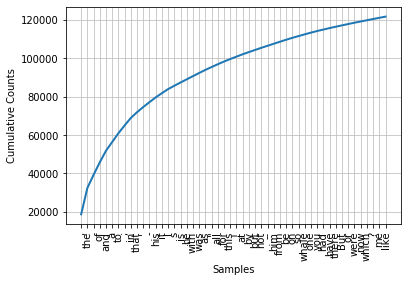

In [15]:
fdist1.plot(50, cumulative=True) # 누적 분포

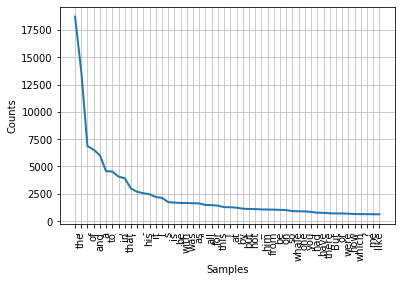

In [16]:
fdist1.plot(50)

## 빈도 분포 응용
- 단어가 영어 알파벳일 경우 소문자로 변환 후 빈도를 구합니다. 
- 또, 단어 길이가 3이상인 경우로 제한해서 빈도를 구해보겠습니다.

In [21]:
# dist = FreqDist(ch.lower() for ch in text1 if ch.isalpha())
dist = FreqDist(ch.lower() for ch in text1 if ch.isalpha() and len(ch)>2)
len(dist)

16854

In [27]:
dist['and']

6430

In [24]:
dist.most_common(5)

[('the', 14431), ('and', 6430), ('that', 3085), ('his', 2530), ('but', 1818)]

In [25]:
[(count, char) for (char, count) in dist.most_common(10)]

[(14431, 'the'),
 (6430, 'and'),
 (3085, 'that'),
 (2530, 'his'),
 (1818, 'but'),
 (1722, 'with'),
 (1644, 'was'),
 (1617, 'for'),
 (1526, 'all'),
 (1394, 'this')]

## 조건을 만족하는 단어 찾기

In [34]:
V = set(text1) #중복 단어 제거

In [35]:
long_words = [w for w in V if len(w)>=15]
sorted(long_words)[:10]

['Bibliographical',
 'CIRCUMNAVIGATION',
 'Ehrenbreitstein',
 'Mephistophelean',
 'Physiognomically',
 'amphitheatrical',
 'apprehensiveness',
 'archiepiscopacy',
 'authoritatively',
 'cannibalistically']

- 단어 길이가 15이상인 단어만 찾아 리스트에 저장합니다. 
- 파이썬 언어의 강점을 살린 이런 코딩 스타일에 익숙해져야 합니다.

In [36]:
len(sorted(long_words))

72

In [40]:
long_word2 = FreqDist([w for w in V if len(w)>=15])
long_word2.most_common(10)

[('supernaturalness', 1),
 ('superstitiously', 1),
 ('philosophically', 1),
 ('internationally', 1),
 ('miscellaneously', 1),
 ('picturesqueness', 1),
 ('skrimshandering', 1),
 ('preternaturalness', 1),
 ('circumnavigating', 1),
 ('characteristics', 1)]

In [32]:
long_words[:10]

['supernaturalness',
 'superstitiously',
 'philosophically',
 'internationally',
 'miscellaneously',
 'picturesqueness',
 'skrimshandering',
 'preternaturalness',
 'circumnavigating',
 'characteristics']

## 단어 길이에 따른 빈도 분포
- 단어 길이를 기준으로 빈도를 조사합니다. 
- 단어에서 재일 짧은 길이는 1이죠. 그렇다면 가장 길이가 긴 단어는? 조사하면 다 나오죠. 20개입니다.

In [41]:
tmp = [len(w) for w in text1]
set(tmp)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20}

In [42]:
fdist = FreqDist(len(w) for w in text1)  # fdist = FreqDist(text1)
print(fdist.values())
print(len(fdist.values()))

dict_values([47933, 42345, 38513, 17111, 9966, 6428, 1873, 26597, 14399, 50223, 3528, 1053, 567, 177, 22, 70, 12, 1, 1])
19


In [43]:
print(fdist) #26만개 단어 중 단어 길이는 모두 19개.

<FreqDist with 19 samples and 260819 outcomes>


In [44]:
fdist.most_common() #Suprise! 단어 길이가 19개인 단어는 없습니다.  

[(3, 50223),
 (1, 47933),
 (4, 42345),
 (2, 38513),
 (5, 26597),
 (6, 17111),
 (7, 14399),
 (8, 9966),
 (9, 6428),
 (10, 3528),
 (11, 1873),
 (12, 1053),
 (13, 567),
 (14, 177),
 (15, 70),
 (16, 22),
 (17, 12),
 (18, 1),
 (20, 1)]

갑자기 길이가 18, 길이가 20인 단어가 궁금해지지 않았나요?

In [46]:
long_18_word = [w for w in text1 if len(w)==18]
long_20_word = [w for w in text1 if len(w)==20]
print(long_18_word, long_20_word)

['characteristically'] ['uninterpenetratingly']


In [47]:
print(fdist.max(), fdist[fdist.max()]) # 가장 많이 나오는 단어의 길이, 몇번 나왔는지

3 50223


길이가 3인 단어의 빈도가 전체 단어 중 19.2%를 차지합니다.

In [48]:
'%2.2f%%' % np.round(fdist.freq(3)*100, 3)

'19.26%'

길이가 5인 단어의 빈도는 전체 단어 중 1.35%에 불과하군요.

In [85]:
fdist[3] / len(text1) == fdist.freq(3)

True

In [49]:
'%2.2f%%' % np.round(fdist.freq(10)*100, 3)

'1.35%'

## Quiz: 다음은 무엇을 찾고 싶어 하는 걸까요?

In [65]:
fdist2 = FreqDist(text2)

swords = [w for w in set(text2) if len(w)>3 and fdist2[w]>500]
sorted(swords)

['Elinor',
 'Marianne',
 'could',
 'from',
 'have',
 'that',
 'which',
 'with',
 'would']

답 : 단어의 길이가 3 이상이고, 그 단어의 빈도수가 500 이상인 단어를 찾아라

## 단어 비교 함수 
- **s.endswith(t)**: 문자열 s가 접미어 t를 갖는지 조사합니다.
- **s.istitle()** : 문자열 s가 제목(title)인지 조사합니다. 첫 글자가 대문자인지 조사합니다.
- **s.isdigit()**: 문자열 s가 숫자인지 조사합니다. 
- **t in s** : 부분문자열 t가 문자열 s 에 있는지 조사합니다.

In [67]:
sorted(w for w in set(text1) if w.endswith('ableness')) # ableness로 끝나는 단어를 찾아라

['comfortableness',
 'honourableness',
 'immutableness',
 'indispensableness',
 'indomitableness',
 'intolerableness',
 'palpableness',
 'reasonableness',
 'uncomfortableness']

In [68]:
sorted(w for w in set(text1) if w.endswith('cial'))

['artificial',
 'commercial',
 'official',
 'provincial',
 'sacrificial',
 'social',
 'special',
 'superficial',
 'unsocial']

In [71]:
sorted(term for term in set(text4) if 'gnt' in term) # 안에 gnt가 있는 단어를 찾아라

['Sovereignty', 'sovereignties', 'sovereignty']

In [73]:
sorted(term for term in set(text4) if 'ded' in term)[:10] # 안에 ded가 있는 단어를 찾아라

['Divided',
 'Guided',
 'accorded',
 'added',
 'afforded',
 'aided',
 'amended',
 'applauded',
 'ascended',
 'attended']

In [74]:
lst = sorted(item for item in set(text6) if item.istitle()) # 대문자로 시작하는 단어를 찾아라
lst[:10]

['A',
 'Aaaaaaaaah',
 'Aaaaaaaah',
 'Aaaaaah',
 'Aaaah',
 'Aaaaugh',
 'Aaagh',
 'Aaah',
 'Aaauggh',
 'Aaaugh']

In [76]:
print(sent7)
sorted(item for item in set(sent7) if item.isdigit()) # 숫자인 것을 찾아라

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']


['29', '61']

## 문자열 출력

In [77]:
sent1

['Call', 'me', 'Ishmael', '.']

- print(word, end=' ') : newline 대신 end 옵션에서 지정한 문자열을 출력. 
- print(word) : 출력할 때마다 newline이 붙음. - 여러 줄에 걸쳐 길게 출력.

In [79]:
for word in sent1:
    print(word, end=' ') 
#     print(word) 

Call me Ishmael . 

In [80]:
for token in sent1:
    if token.islower():
        print(token, 'is a lowercase word')
    elif token.istitle():
        print(token, 'is a titlecase word')
    else:
        print(token, 'is a punctuation')

Call is a titlecase word
me is a lowercase word
Ishmael is a titlecase word
. is a punctuation
